BRINGING THE DOGS - CATS - PANDAS  DATASET from Kaggle

This notebook ALSO CREATES THE DIRECTORY STRUCTURE THAT WE WANT  

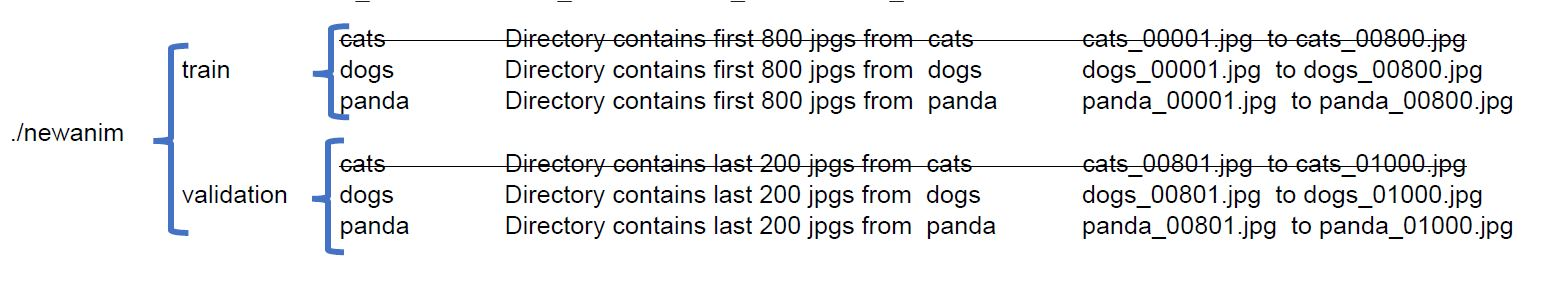

(to THEN follow a process similar to the one used in process ni Chapter 5 of the book for for Dogs-vs-Cat)

In [6]:
# Putting the kaggle.json file in place for this Colab session
# Upload kaggle.json from your PC - THese 2 lines will ASK you to CHOOSE the file in your PC
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"rafiahmed01","key":"98c5096cfb214557bfdca79676c58d77"}'}

In [7]:
# IF NECESSARY remove a PREVIOUS directory for kaggle.json
!rm -r ~/.kaggle/

In [8]:
# Create an appropriate directory for your kaggle.json file and put it there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

IF YOU ALREADY HAVE THE Kaggle.json file in place - CONTINUE HERE

In [9]:
# bringing in the dataset
!kaggle datasets download -d ashishsaxena2209/animal-image-datasetdog-cat-and-panda

 96% 361M/376M [00:06<00:00, 58.2MB/s]
100% 376M/376M [00:06<00:00, 57.2MB/s]


In [10]:
!ls -l

total 384652
-rw-r--r-- 1 root root 393866738 Apr 12 22:32  animal-image-datasetdog-cat-and-panda.zip
-rw-r--r-- 1 root root        67 Apr 12 22:32 'kaggle (1).json'
-rw-r--r-- 1 root root        67 Apr 12 22:31  kaggle.json
drwxr-xr-x 1 root root      4096 Apr  7 13:36  sample_data


In [11]:
# Quietly UNZIP the file  animal-image-datasetdog-cat-and-panda.zip
!unzip -qq animal-image-datasetdog-cat-and-panda.zip


In [ ]:
!ls -l

total 384656
-rw-r--r-- 1 root root 393866738 Apr 12 00:22 animal-image-datasetdog-cat-and-panda.zip
drwxr-xr-x 7 root root      4096 Apr 12 00:22 animals
drwxr-xr-x 2 root root      4096 Apr 12 00:22 images
-rw-r--r-- 1 root root        67 Apr 12 00:22 kaggle.json
drwxr-xr-x 1 root root      4096 Apr  7 13:36 sample_data


In [12]:
!rm -r newanim   # ONLY for cleaning up aafter a failed attempt

rm: cannot remove 'newanim': No such file or directory


In [13]:
!ls -l ./animals/

total 116
drwxr-xr-x 5 root root  4096 Apr 12 22:32 animals
drwxr-xr-x 2 root root 36864 Apr 12 22:32 cats
drwxr-xr-x 2 root root 36864 Apr 12 22:32 dogs
drwxr-xr-x 2 root root  4096 Apr 12 22:32 images
drwxr-xr-x 2 root root 36864 Apr 12 22:33 panda


In [ ]:
# VERIFYING THAT YOU NOW HAVE 1000 IMAGES IN THE # DIRECTORIES
# If you "uncomment" any of these 3 lines. The ouput will list ONE THOUSAND LINES
# where each line is the information about one JPG file
# For example if you uncomment    !ls -l ./animals/cats/
# YOU WILL SEE:
#-rw-r--r-- 1 root root 30233 Oct 24  2019 cats_00001.jpg
# -rw-r--r-- 1 root root 32771 Oct 24  2019 cats_00002.jpg
# ....
# -rw-r--r-- 1 root root 13243 Oct 24  2019 cats_00999.jpg
# -rw-r--r-- 1 root root 26213 Oct 24  2019 cats_01000.jpg
#
#
# !ls -l ./animals/cats/
# !ls -l ./animals/dogs/
# !ls -l ./animals/panda/

!ls -l  ./animals/

total 116
drwxr-xr-x 5 root root  4096 Apr 12 00:22 animals
drwxr-xr-x 2 root root 36864 Apr 12 00:22 cats
drwxr-xr-x 2 root root 36864 Apr 12 00:22 dogs
drwxr-xr-x 2 root root  4096 Apr 12 00:22 images
drwxr-xr-x 2 root root 36864 Apr 12 00:22 panda


NOW TRYING TO CREAT THE NEW DIRECTORY STRUCTURE

Under newanim 2 subdirectories: train and validation

within EACH of those 2, will have 3 subdirectories:  dogs cats   panda

Notice there is no final "s" is in panda

That is also true regarding the individual filenames: cats_00001.jpg but panda_00001.jpg

In [ ]:
#ONLY FOR DEBUGGING
# uncomment these lines ONLY if you need to REMOVE
# DIRECTORIES PREVIOUSLY CREATED by failed attempts
#
# !rm -r ./newanim/train/
# !rm -r ./newanim/validation/


In [14]:
import os, shutil, pathlib
original_dir = pathlib.Path('animals')
new_base_dir = pathlib.Path('newanim')
def make_subset(subset_name, start_index, end_index):
  # for category in ('cats', 'dogs', 'panda'):
  for category in ('cats', 'panda'):
    dir = new_base_dir / subset_name / category
    dirsrc = original_dir / category
    os.makedirs(dir)
    fnames = ['{}_{:05d}.jpg'.format(category, i)
                  for i in range(start_index, end_index)]
    for fname in fnames:
     shutil.copyfile(src=dirsrc / fname , dst=dir / fname)    
    
# make_subset('train', start_index=0, end_index=1000)
# make_subset('validation', start_index=1000, end_index=1500)
# # make_subset('test', start_index=1500, end_index=2500)

make_subset('train', start_index=1, end_index=801)
make_subset('validation', start_index=801, end_index=1001)

In [15]:
# VERIFY sub-directories under train
!ls -l  ./newanim/train/

total 68
drwxr-xr-x 2 root root 36864 Apr 12 22:33 cats
drwxr-xr-x 2 root root 32768 Apr 12 22:33 panda


In [16]:
# VERIFY sub-directories under validation
!ls -l  ./newanim/validation/

total 24
drwxr-xr-x 2 root root 12288 Apr 12 22:33 cats
drwxr-xr-x 2 root root 12288 Apr 12 22:33 panda


In [ ]:
# ONLY uncomment &execute this cell if you need to see al the files in TRAIN
# IT WILL print out 800 + 800 + 800 = 2400 filenames!

# Verifying the 3 "train" subdirs
#!ls   ./newanim/train/*

In [ ]:
# ONLY uncomment & execute this cell if you need to see al the files in VALIDATION
# IT WILL print out 200 + 200 + 200 = 600 filenames!

# Verifying the 3 "validation" subdirs
# !ls   ./newanim/validation/*

NOTICE: DO NOT EXECUTE THIS LASTCELL IF YOU WANT TO USE THE APPROACH IN CH 5 (ED 1), (instead of the approach in CH 8, E 2)

 Do not do this - NOW using Listing 8.9 (from 2ND ED.) to do the preprocessing and create img datasets

In [ ]:
 ### CELL ERASED BECAUSE SHOULD NOT BE USED FOR FOLLOWING APPROACH IN CH 5

YOU WILL NEED TO MODIFY SOME OF THE PREVIOUS CELLS WHEN, FOR EXAMPLE YOU ONLY WANT TO DEAL WITH PANDAS AND DOGS.
For example in the deinition of function get_subset, above, the line

for category in ('cats', 'dogs', 'panda'):

may need to be changed to

for category in ('dogs', 'panda'):

In [17]:
from matplotlib import image
from matplotlib import pyplot

dd = image.imread('/content/newanim/train/cats/cats_00001.jpg')
dd.shape


(374, 500, 3)

In [18]:
base_dir = pathlib.Path('newanim')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [19]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [20]:
from keras import layers
from keras import models

#def pvcm1():
pvcm1 = models.Sequential()
pvcm1.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
pvcm1.add(layers.MaxPooling2D((2, 2)))
pvcm1.add(layers.Conv2D(64, (3, 3), activation='relu'))
pvcm1.add(layers.MaxPooling2D((2, 2)))
pvcm1.add(layers.Conv2D(128, (3, 3), activation='relu'))
pvcm1.add(layers.MaxPooling2D((2, 2)))
pvcm1.add(layers.Conv2D(128, (3, 3), activation='relu'))
pvcm1.add(layers.MaxPooling2D((2, 2)))
pvcm1.add(layers.Flatten())
pvcm1.add(layers.Dense(512, activation='relu'))
pvcm1.add(layers.Dense(1, activation='sigmoid'))
  
  #return model

In [ ]:
pvcm1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 15, 15, 128)      

In [21]:
from keras import optimizers

pvcm1.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
history_pvcm1 = pvcm1.fit(
      train_generator,
      steps_per_epoch = 80,
      epochs=30,
      validation_data=validation_generator,validation_steps=20)

Epoch 1/30
80/80 [==============================] - 9s 97ms/step - loss: 0.5481 - acc: 0.7224 - val_loss: 0.3317 - val_acc: 0.8600
Epoch 2/30
80/80 [==============================] - 8s 96ms/step - loss: 0.2925 - acc: 0.8792 - val_loss: 0.2612 - val_acc: 0.8875
Epoch 3/30
80/80 [==============================] - 8s 99ms/step - loss: 0.2546 - acc: 0.9011 - val_loss: 0.2627 - val_acc: 0.8925
Epoch 4/30
80/80 [==============================] - 8s 97ms/step - loss: 0.2450 - acc: 0.8983 - val_loss: 0.2720 - val_acc: 0.8950
Epoch 5/30
80/80 [==============================] - 8s 96ms/step - loss: 0.2189 - acc: 0.9174 - val_loss: 0.1971 - val_acc: 0.9200
Epoch 6/30
80/80 [==============================] - 8s 95ms/step - loss: 0.1856 - acc: 0.9283 - val_loss: 0.2012 - val_acc: 0.9125
Epoch 7/30
80/80 [==============================] - 8s 96ms/step - loss: 0.1585 - acc: 0.9348 - val_loss: 0.1818 - val_acc: 0.9375
Epoch 8/30
80/80 [==============================] - 8s 96ms/step - loss: 0.1446 - a

In [ ]:
pvcm1.save('cats_and_panda_1.h5')

In [ ]:
!ls -l

total 411700
-rw-r--r-- 1 root root 393866738 Apr 11 17:09  animal-image-datasetdog-cat-and-panda.zip
drwxr-xr-x 7 root root      4096 Apr 11 17:09  animals
-rw-r--r-- 1 root root  27683800 Apr 11 17:52  cats_and_panda_1.h5
drwxr-xr-x 2 root root      4096 Apr 11 17:48  images
-rw-r--r-- 1 root root        67 Apr 11 17:48 'kaggle (1).json'
-rw-r--r-- 1 root root        67 Apr 11 17:08  kaggle.json
drwxr-xr-x 4 root root      4096 Apr 11 17:48  newanim
drwxr-xr-x 1 root root      4096 Apr  7 13:36  sample_data


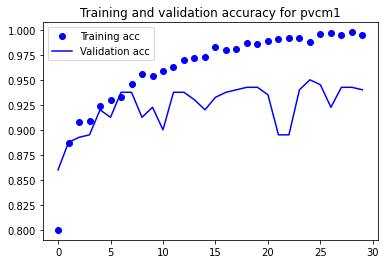

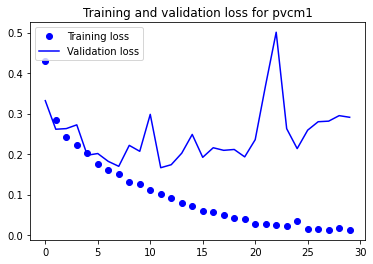

In [ ]:
import matplotlib.pyplot as plt

acc_pvcm1 = history_pvcm1.history['acc']
val_acc_pvcm1 = history_pvcm1.history['val_acc']
loss_pvcm1 = history_pvcm1.history['loss']
val_loss_pvcm1 = history_pvcm1.history['val_loss']

epochs = range(len(acc_pvcm1))

plt.plot(epochs, acc_pvcm1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_pvcm1, 'b', label='Validation acc')
plt.title('Training and validation accuracy for pvcm1')
plt.legend()

plt.figure()

plt.plot(epochs, loss_pvcm1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_pvcm1, 'b', label='Validation loss')
plt.title('Training and validation loss for pvcm1')
plt.legend()

plt.show()

In [22]:
history_pvcm1_final = pvcm1.fit(
      train_generator,
      steps_per_epoch = 80,
      epochs=8,
      validation_data=validation_generator,validation_steps=20)

Epoch 1/8
80/80 [==============================] - 26s 108ms/step - loss: 0.5358 - acc: 0.7275 - val_loss: 0.3016 - val_acc: 0.8775
Epoch 2/8
80/80 [==============================] - 9s 111ms/step - loss: 0.3073 - acc: 0.8724 - val_loss: 0.4308 - val_acc: 0.8150
Epoch 3/8
80/80 [==============================] - 8s 105ms/step - loss: 0.2606 - acc: 0.8845 - val_loss: 0.2314 - val_acc: 0.9100
Epoch 4/8
80/80 [==============================] - 9s 107ms/step - loss: 0.2263 - acc: 0.9058 - val_loss: 0.2443 - val_acc: 0.9050
Epoch 5/8
80/80 [==============================] - 9s 109ms/step - loss: 0.2128 - acc: 0.9096 - val_loss: 0.1965 - val_acc: 0.9200
Epoch 6/8
80/80 [==============================] - 8s 103ms/step - loss: 0.1949 - acc: 0.9203 - val_loss: 0.1989 - val_acc: 0.9275
Epoch 7/8
80/80 [==============================] - 8s 104ms/step - loss: 0.1479 - acc: 0.9439 - val_loss: 0.1882 - val_acc: 0.9225
Epoch 8/8
80/80 [==============================] - 9s 113ms/step - loss: 0.1573 - 

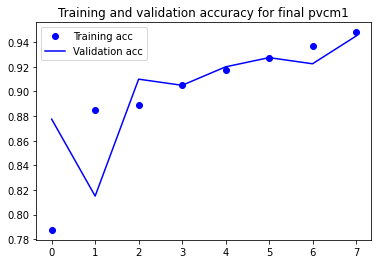

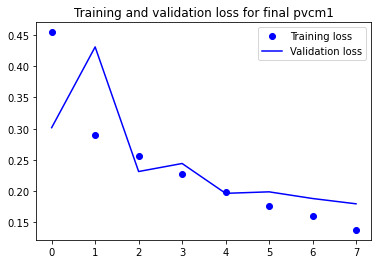

In [38]:
import matplotlib.pyplot as plt

acc_pvcm1_final = history_pvcm1_final.history['acc']
val_acc_pvcm1_final = history_pvcm1_final.history['val_acc']
loss_pvcm1_final = history_pvcm1_final.history['loss']
val_loss_pvcm1_final = history_pvcm1_final.history['val_loss']

epochs = range(len(acc_pvcm1_final))

plt.plot(epochs, acc_pvcm1_final, 'bo', label='Training acc')
plt.plot(epochs, val_acc_pvcm1_final, 'b', label='Validation acc')
plt.title('Training and validation accuracy for final pvcm1')
plt.legend()

plt.figure()

plt.plot(epochs, loss_pvcm1_final, 'bo', label='Training loss')
plt.plot(epochs, val_loss_pvcm1_final, 'b', label='Validation loss')
plt.title('Training and validation loss for final pvcm1')
plt.legend()

plt.show()

In [24]:
pvcm1.save('cats_and_panda_1.h5')

In [25]:
from keras import layers
from keras import models

#pvcm2
pvcm2 = models.Sequential()
pvcm2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
pvcm2.add(layers.MaxPooling2D((2, 2)))
pvcm2.add(layers.Conv2D(64, (3, 3), activation='relu'))
pvcm2.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.5))
pvcm2.add(layers.Conv2D(128, (3, 3), activation='relu'))
pvcm2.add(layers.MaxPooling2D((2, 2)))
pvcm2.add(layers.Conv2D(128, (3, 3), activation='relu'))
pvcm2.add(layers.MaxPooling2D((2, 2)))
pvcm2.add(layers.Conv2D(128, (3, 3), activation='relu'))
pvcm2.add(layers.MaxPooling2D((2, 2)))
pvcm2.add(layers.Flatten())
pvcm2.add(layers.Dropout(0.5))
pvcm2.add(layers.Dense(512, activation='relu'))
pvcm2.add(layers.Dense(1, activation='sigmoid'))
  

In [ ]:
pvcm2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 15, 15, 128)      

In [26]:
from keras import optimizers

pvcm2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history_pvcm2 = pvcm2.fit(
      train_generator,
      steps_per_epoch = 80,
      epochs=30,
      validation_data=validation_generator,validation_steps=20)

Epoch 1/30
80/80 [==============================] - 10s 111ms/step - loss: 0.6279 - acc: 0.6212 - val_loss: 0.3717 - val_acc: 0.8450
Epoch 2/30
80/80 [==============================] - 9s 109ms/step - loss: 0.3939 - acc: 0.8301 - val_loss: 0.3186 - val_acc: 0.8675
Epoch 3/30
80/80 [==============================] - 9s 108ms/step - loss: 0.3222 - acc: 0.8687 - val_loss: 0.3154 - val_acc: 0.8725
Epoch 4/30
80/80 [==============================] - 9s 109ms/step - loss: 0.2948 - acc: 0.8779 - val_loss: 0.2851 - val_acc: 0.8825
Epoch 5/30
80/80 [==============================] - 9s 109ms/step - loss: 0.2845 - acc: 0.8888 - val_loss: 0.2809 - val_acc: 0.8925
Epoch 6/30
80/80 [==============================] - 9s 107ms/step - loss: 0.2577 - acc: 0.9006 - val_loss: 0.2710 - val_acc: 0.8875
Epoch 7/30
80/80 [==============================] - 9s 108ms/step - loss: 0.2568 - acc: 0.8960 - val_loss: 0.2656 - val_acc: 0.8975
Epoch 8/30
80/80 [==============================] - 9s 107ms/step - loss: 0

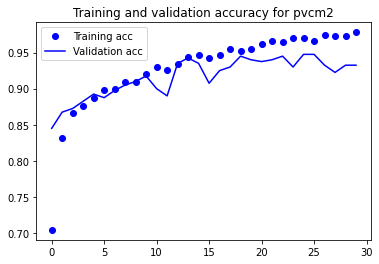

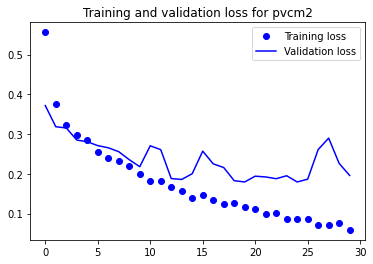

In [ ]:
import matplotlib.pyplot as plt

acc_pvcm2 = history_pvcm2.history['acc']
val_acc_pvcm2 = history_pvcm2.history['val_acc']
loss_pvcm2 = history_pvcm2.history['loss']
val_loss_pvcm2 = history_pvcm2.history['val_loss']

epochs2 = range(len(acc_pvcm2))

plt.plot(epochs2, acc_pvcm2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc_pvcm2, 'b', label='Validation acc')
plt.title('Training and validation accuracy for pvcm2')
plt.legend()

plt.figure()

plt.plot(epochs2, loss_pvcm2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss_pvcm2, 'b', label='Validation loss')
plt.title('Training and validation loss for pvcm2')
plt.legend()

plt.show()

In [27]:
history_pvcm2_final = pvcm2.fit(
      train_generator,
      steps_per_epoch = 80,
      epochs=13,
      validation_data=validation_generator,validation_steps=20)

Epoch 1/13
80/80 [==============================] - 10s 107ms/step - loss: 0.6546 - acc: 0.5784 - val_loss: 0.4513 - val_acc: 0.7900
Epoch 2/13
80/80 [==============================] - 9s 107ms/step - loss: 0.3939 - acc: 0.8399 - val_loss: 0.3819 - val_acc: 0.8325
Epoch 3/13
80/80 [==============================] - 9s 110ms/step - loss: 0.3498 - acc: 0.8581 - val_loss: 0.3755 - val_acc: 0.8425
Epoch 4/13
80/80 [==============================] - 8s 103ms/step - loss: 0.3042 - acc: 0.8809 - val_loss: 0.2967 - val_acc: 0.8875
Epoch 5/13
80/80 [==============================] - 9s 110ms/step - loss: 0.3005 - acc: 0.8716 - val_loss: 0.2733 - val_acc: 0.8925
Epoch 6/13
80/80 [==============================] - 8s 106ms/step - loss: 0.2799 - acc: 0.8836 - val_loss: 0.3686 - val_acc: 0.8675
Epoch 7/13
80/80 [==============================] - 8s 102ms/step - loss: 0.2533 - acc: 0.8974 - val_loss: 0.2624 - val_acc: 0.9000
Epoch 8/13
80/80 [==============================] - 9s 109ms/step - loss: 0

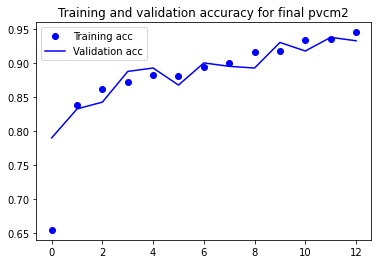

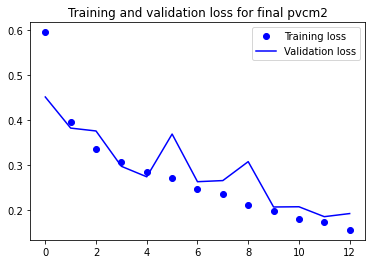

In [28]:
import matplotlib.pyplot as plt

acc_pvcm2_final = history_pvcm2_final.history['acc']
val_acc_pvcm2_final = history_pvcm2_final.history['val_acc']
loss_pvcm2_final = history_pvcm2_final.history['loss']
val_loss_pvcm2_final = history_pvcm2_final.history['val_loss']

epochs2 = range(len(acc_pvcm2_final))

plt.plot(epochs2, acc_pvcm2_final, 'bo', label='Training acc')
plt.plot(epochs2, val_acc_pvcm2_final, 'b', label='Validation acc')
plt.title('Training and validation accuracy for final pvcm2')
plt.legend()

plt.figure()

plt.plot(epochs2, loss_pvcm2_final, 'bo', label='Training loss')
plt.plot(epochs2, val_loss_pvcm2_final, 'b', label='Validation loss')
plt.title('Training and validation loss for final pvcm2')
plt.legend()

plt.show()

In [29]:
pvcm2.save('cats_and_panda_2.h5')

**Data Augmentation**

In [30]:
#Data Augmentation

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

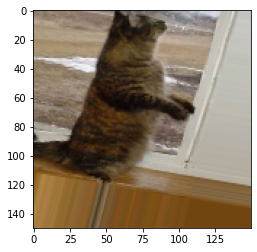

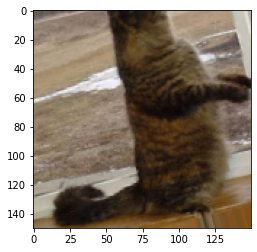

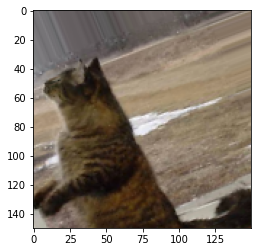

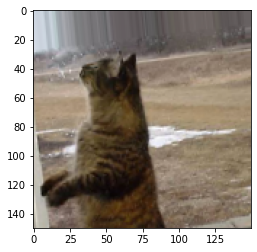

In [31]:
# This is module with image preprocessing utilities
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Directories
base_dir = pathlib.Path('newanim')
train_dir = os.path.join(base_dir, 'train')
train_dir_cats = os.path.join(train_dir, 'cats')

fnames = [os.path.join(train_dir_cats, fname) for fname in os.listdir(train_dir_cats)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [32]:
from keras import layers
from keras import models
from keras import optimizers

#pvcm3

pvcm3 = models.Sequential()
pvcm3.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
pvcm3.add(layers.MaxPooling2D((2, 2)))
pvcm3.add(layers.Conv2D(64, (3, 3), activation='relu'))
pvcm3.add(layers.MaxPooling2D((2, 2)))
pvcm3.add(layers.Conv2D(128, (3, 3), activation='relu'))
pvcm3.add(layers.MaxPooling2D((2, 2)))
pvcm3.add(layers.Conv2D(128, (3, 3), activation='relu'))
pvcm3.add(layers.MaxPooling2D((2, 2)))
pvcm3.add(layers.Conv2D(128, (3, 3), activation='relu'))
pvcm3.add(layers.MaxPooling2D((2, 2)))
pvcm3.add(layers.Flatten())
pvcm3.add(layers.Dropout(0.5))
pvcm3.add(layers.Dense(512, activation='relu'))
pvcm3.add(layers.Dense(1, activation='sigmoid'))

pvcm3.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
pvcm3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 15, 15, 128)      

In [33]:
train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen1 = ImageDataGenerator(rescale=1./255)

train_generator_aug = train_datagen_aug.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        # batch_size=32,
        batch_size=50,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator1 = test_datagen1.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        # batch_size=32,
        batch_size=50,
        class_mode='binary')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
history_pvcm3 = pvcm3.fit(
      train_generator_aug,
      # steps_per_epoch=100,
      steps_per_epoch=32,
      epochs=100,
      validation_data=validation_generator1,
      #validation_steps=50)
      validation_steps=8)

Epoch 1/100
32/32 [==============================] - 16s 465ms/step - loss: 0.6786 - acc: 0.5294 - val_loss: 0.5629 - val_acc: 0.7475
Epoch 2/100
32/32 [==============================] - 15s 462ms/step - loss: 0.5751 - acc: 0.7368 - val_loss: 0.5553 - val_acc: 0.7300
Epoch 3/100
32/32 [==============================] - 14s 451ms/step - loss: 0.4749 - acc: 0.7707 - val_loss: 0.4304 - val_acc: 0.8000
Epoch 4/100
32/32 [==============================] - 14s 449ms/step - loss: 0.4448 - acc: 0.7954 - val_loss: 0.3516 - val_acc: 0.8575
Epoch 5/100
32/32 [==============================] - 14s 447ms/step - loss: 0.4258 - acc: 0.8112 - val_loss: 0.4503 - val_acc: 0.7900
Epoch 6/100
32/32 [==============================] - 14s 442ms/step - loss: 0.4060 - acc: 0.8136 - val_loss: 0.3181 - val_acc: 0.8650
Epoch 7/100
32/32 [==============================] - 14s 446ms/step - loss: 0.3846 - acc: 0.8322 - val_loss: 0.3181 - val_acc: 0.8725
Epoch 8/100
32/32 [==============================] - 15s 464ms

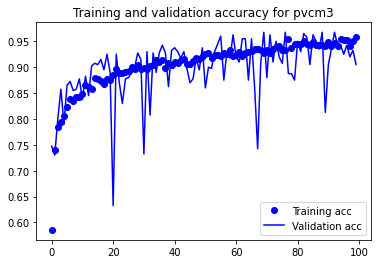

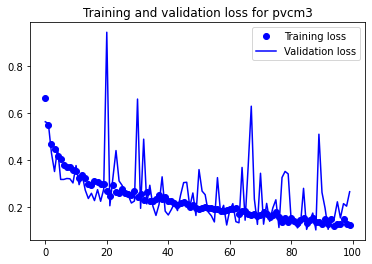

In [ ]:
import matplotlib.pyplot as plt

acc_pvcm3 = history_pvcm3.history['acc']
val_acc_pvcm3 = history_pvcm3.history['val_acc']
loss_pvcm3 = history_pvcm3.history['loss']
val_loss_pvcm3 = history_pvcm3.history['val_loss']

epochs3 = range(len(acc_pvcm3))

plt.plot(epochs3, acc_pvcm3, 'bo', label='Training acc')
plt.plot(epochs3, val_acc_pvcm3, 'b', label='Validation acc')
plt.title('Training and validation accuracy for pvcm3')
plt.legend()

plt.figure()

plt.plot(epochs3, loss_pvcm3, 'bo', label='Training loss')
plt.plot(epochs3, val_loss_pvcm3, 'b', label='Validation loss')
plt.title('Training and validation loss for pvcm3')
plt.legend()

plt.show()

In [34]:
history_pvcm3_final = pvcm3.fit(
      train_generator_aug,
      # steps_per_epoch=100,
      steps_per_epoch=32,
      epochs=60,
      validation_data=validation_generator1,
      #validation_steps=50)
      validation_steps=8)

Epoch 1/60
32/32 [==============================] - 17s 504ms/step - loss: 0.6825 - acc: 0.5210 - val_loss: 0.6009 - val_acc: 0.7500
Epoch 2/60
32/32 [==============================] - 16s 504ms/step - loss: 0.5881 - acc: 0.7271 - val_loss: 0.4414 - val_acc: 0.7850
Epoch 3/60
32/32 [==============================] - 16s 488ms/step - loss: 0.4862 - acc: 0.7901 - val_loss: 0.3848 - val_acc: 0.8350
Epoch 4/60
32/32 [==============================] - 15s 483ms/step - loss: 0.4371 - acc: 0.7867 - val_loss: 0.3830 - val_acc: 0.8350
Epoch 5/60
32/32 [==============================] - 16s 507ms/step - loss: 0.4104 - acc: 0.8087 - val_loss: 0.4936 - val_acc: 0.7850
Epoch 6/60
32/32 [==============================] - 16s 485ms/step - loss: 0.3900 - acc: 0.8405 - val_loss: 0.3882 - val_acc: 0.8200
Epoch 7/60
32/32 [==============================] - 16s 490ms/step - loss: 0.3499 - acc: 0.8567 - val_loss: 0.2901 - val_acc: 0.8850
Epoch 8/60
32/32 [==============================] - 16s 495ms/step - 

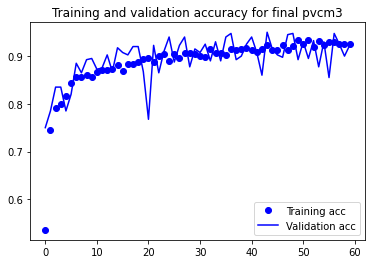

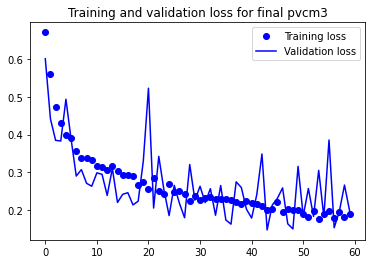

In [39]:
import matplotlib.pyplot as plt

acc_pvcm3_final = history_pvcm3_final.history['acc']
val_acc_pvcm3_final = history_pvcm3_final.history['val_acc']
loss_pvcm3_final = history_pvcm3_final.history['loss']
val_loss_pvcm3_final = history_pvcm3_final.history['val_loss']

epochs3 = range(len(acc_pvcm3_final))

plt.plot(epochs3, acc_pvcm3_final, 'bo', label='Training acc')
plt.plot(epochs3, val_acc_pvcm3_final, 'b', label='Validation acc')
plt.title('Training and validation accuracy for final pvcm3')
plt.legend()

plt.figure()

plt.plot(epochs3, loss_pvcm3_final, 'bo', label='Training loss')
plt.plot(epochs3, val_loss_pvcm3_final, 'b', label='Validation loss')
plt.title('Training and validation loss for final pvcm3')
plt.legend()

plt.show()

In [40]:
pvcm3.save('cats_and_panda_3.h5')

In [41]:
pvcm3.get_weights()

[array([[[[-1.09978095e-01,  8.23634639e-02,  1.45182282e-01,
           -1.12411745e-01, -5.10541499e-02, -1.51663870e-02,
           -3.60611714e-02,  8.47561359e-02,  1.04226589e-01,
            4.62097861e-02, -1.32975534e-01,  5.79558425e-02,
           -8.05985779e-02, -2.21485971e-03, -4.22676876e-02,
           -2.65232585e-02,  4.64993529e-02, -2.76061725e-02,
            1.22861512e-01, -4.28897291e-02,  1.14096329e-01,
            7.50471875e-02,  7.00593069e-02, -1.22495525e-01,
            5.51020205e-02, -1.94619838e-02, -7.73379952e-02,
           -2.31486261e-02, -6.94783106e-02,  4.18566018e-02,
           -1.27590314e-01, -6.07436970e-02],
          [ 2.19670814e-02, -4.35133316e-02, -6.00140393e-02,
           -7.51817226e-02,  5.60008958e-02,  3.88173829e-03,
           -1.56858429e-01, -5.47657534e-03, -7.11682215e-02,
           -9.59848911e-02,  5.40764257e-02, -7.87674934e-02,
           -6.71435297e-02,  1.33470595e-01, -5.12063392e-02,
           -2.70577297e-

In [42]:
import keras

model_test = keras.models.load_model('cats_and_panda_3.h5')

In [43]:
model_test.get_weights()

[array([[[[-1.09978095e-01,  8.23634639e-02,  1.45182282e-01,
           -1.12411745e-01, -5.10541499e-02, -1.51663870e-02,
           -3.60611714e-02,  8.47561359e-02,  1.04226589e-01,
            4.62097861e-02, -1.32975534e-01,  5.79558425e-02,
           -8.05985779e-02, -2.21485971e-03, -4.22676876e-02,
           -2.65232585e-02,  4.64993529e-02, -2.76061725e-02,
            1.22861512e-01, -4.28897291e-02,  1.14096329e-01,
            7.50471875e-02,  7.00593069e-02, -1.22495525e-01,
            5.51020205e-02, -1.94619838e-02, -7.73379952e-02,
           -2.31486261e-02, -6.94783106e-02,  4.18566018e-02,
           -1.27590314e-01, -6.07436970e-02],
          [ 2.19670814e-02, -4.35133316e-02, -6.00140393e-02,
           -7.51817226e-02,  5.60008958e-02,  3.88173829e-03,
           -1.56858429e-01, -5.47657534e-03, -7.11682215e-02,
           -9.59848911e-02,  5.40764257e-02, -7.87674934e-02,
           -6.71435297e-02,  1.33470595e-01, -5.12063392e-02,
           -2.70577297e-